# Training Images Generator

In this notebook, we are generating a thousand images from each of the 21 slides we are given. We accomplish this by randomly selecting pixel 400 by 400 pixel ranges and then testing whether over 50% of the image is tissue. If this is the case, we save the image and its corresponding mask to a Google Drive folder. We also include code from some of our other data testing and cleansing tasks.

## Initializing our environment

In [0]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
from google.colab import drive

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
drive.mount('/gdrive')
drive_root = '/gdrive/My Drive/slides/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Utility Functions

These functions are useful to read the slide to an image and to find tissue pixels in the images

In [0]:
def find_tissue_pixels(image, intensity=0.8):
    im_gray = rgb2gray(image)
    assert im_gray.shape == (image.shape[0], image.shape[1])
    indices = np.where(im_gray <= intensity)
    return zip(indices[0], indices[1])

In [0]:
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

## Generating training data

In [0]:
# Global Variables
IMG_SIZE = 400
SLIDE_LEVEL = 2
train_path = '/gdrive/My Drive/train_data/level_{}/images'.format(SLIDE_LEVEL)
mask_path = '/gdrive/My Drive/train_data/level_{}/masks'.format(SLIDE_LEVEL)

In [0]:
img_mask = []
for filename in os.listdir(drive_root):
  if filename[-8:] == 'mask.tif':
    imgpair = (filename.split('_mask')[0] + '.tif', filename)
    img_mask.append(imgpair)

assert len(img_mask) == 21

In [0]:
from random import randint

image_no = 0
for image_file, mask_file in img_mask:
  slide_path = os.path.join(drive_root, image_file)
  tumor_mask_path = os.path.join(drive_root, mask_file)
  slide = open_slide(slide_path)
  tumor_mask = open_slide(tumor_mask_path)

  x_range, y_range = np.array(slide.level_dimensions[SLIDE_LEVEL]) - IMG_SIZE

  slide_no = 0
  while slide_no < 1000:
    x, y = randint(0, x_range), randint(0, y_range)
    
    new_img = read_slide(slide, x=x*pow(2,SLIDE_LEVEL), y=y*pow(2,SLIDE_LEVEL), level=SLIDE_LEVEL, width=IMG_SIZE, height=IMG_SIZE)
    new_mask = read_slide(tumor_mask, x=x*pow(2,SLIDE_LEVEL), y=y*pow(2,SLIDE_LEVEL), level=SLIDE_LEVEL, width=IMG_SIZE, height=IMG_SIZE)

    new_mask = new_mask[:,:,0]
    
    tissue_pixels = list(find_tissue_pixels(new_img))
    percent_tissue = len(tissue_pixels) / float(new_img.shape[0] * new_img.shape[0]) * 100

    if percent_tissue > 50.0:
      image_no += 1
      slide_no += 1
      plt.imsave(os.path.join(train_path,"train_{}.png".format(image_no)),new_img)
      plt.imsave(os.path.join(mask_path,"train_mask_{}.png".format(image_no)),new_mask)
      print("Image {} saved!".format(image_no))

Image 17001 saved!
Image 17002 saved!
Image 17003 saved!
Image 17004 saved!
Image 17005 saved!
Image 17006 saved!
Image 17007 saved!
Image 17008 saved!
Image 17009 saved!
Image 17010 saved!
Image 17011 saved!
Image 17012 saved!
Image 17013 saved!
Image 17014 saved!
Image 17015 saved!
Image 17016 saved!
Image 17017 saved!
Image 17018 saved!
Image 17019 saved!
Image 17020 saved!
Image 17021 saved!
Image 17022 saved!
Image 17023 saved!
Image 17024 saved!
Image 17025 saved!
Image 17026 saved!
Image 17027 saved!
Image 17028 saved!
Image 17029 saved!
Image 17030 saved!
Image 17031 saved!
Image 17032 saved!
Image 17033 saved!
Image 17034 saved!
Image 17035 saved!
Image 17036 saved!
Image 17037 saved!
Image 17038 saved!
Image 17039 saved!
Image 17040 saved!
Image 17041 saved!
Image 17042 saved!
Image 17043 saved!
Image 17044 saved!
Image 17045 saved!
Image 17046 saved!
Image 17047 saved!
Image 17048 saved!
Image 17049 saved!
Image 17050 saved!
Image 17051 saved!
Image 17052 saved!
Image 17053 

In [0]:
!zip -r /gdrive/My\ Drive/train_data/level_2/masks.zip /gdrive/My\ Drive/train_data/level_2/masks/

Scanning files .... .......
  adding: gdrive/My Drive/train_data/level_2/masks/ (stored 0%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3009.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3010.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3011.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3012.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3013.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3014.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3015.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3016.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3017.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/masks/train_mask_3018.png (deflated 90%)
  adding: gdrive/My Drive/train_data/level_2/mas

## Preprocess and Generate Inception Activations

In [0]:
def image_to_activations(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (400, 400))
    activations = tf.keras.applications.inception_v3.preprocess_input(img)
    return activations, image_path

In [0]:
image_path_set = set()
for filename in os.listdir(train_path):
  if int(filename.split('_')[1].split('.')[0]) <= 18000:
    image_path_set.add(os.path.join(train_path, filename))

assert len(image_path_set) == 18000

In [0]:
image_model = tf.keras.applications.InceptionV3(input_shape=(400,400,3),
                                                include_top=False,
                                                pooling='max',
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 7s 0us/step


In [0]:
activation_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
activation_dataset = activation_dataset.map(
  image_to_activations, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

In [0]:
for img_batch, path_batch in activation_dataset:
  batch_features = image_features_extract_model(img_batch)
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    filename = 'activations/' + path_of_feature.split('/')[-1]
    print(filename)
    np.save(filename, bf.numpy())  

activations/train_9594.png
activations/train_13184.png
activations/train_1828.png
activations/train_886.png
activations/train_8532.png
activations/train_95.png
activations/train_4373.png
activations/train_10450.png
activations/train_4455.png
activations/train_16856.png
activations/train_5684.png
activations/train_2640.png
activations/train_8658.png
activations/train_1882.png
activations/train_17778.png
activations/train_12635.png
activations/train_4893.png
activations/train_15942.png
activations/train_4369.png
activations/train_11788.png
activations/train_1917.png
activations/train_9897.png
activations/train_5832.png
activations/train_796.png
activations/train_17926.png
activations/train_4410.png
activations/train_4052.png
activations/train_12142.png
activations/train_14528.png
activations/train_15161.png
activations/train_6999.png
activations/train_713.png
activations/train_4168.png
activations/train_12696.png
activations/train_11800.png
activations/train_2763.png
activations/train_94

In [0]:
!zip -r activations.zip activations/
os.system("cp activations.zip /gdrive/My\ Drive/train_data/level_{}/".format(SLIDE_LEVEL))

  adding: activations/ (stored 0%)
  adding: activations/train_11136.png.npy (deflated 11%)
  adding: activations/train_11383.png.npy (deflated 12%)
  adding: activations/train_6465.png.npy (deflated 11%)
  adding: activations/train_5448.png.npy (deflated 11%)
  adding: activations/train_16277.png.npy (deflated 13%)
  adding: activations/train_13444.png.npy (deflated 11%)
  adding: activations/train_10483.png.npy (deflated 11%)
  adding: activations/train_9265.png.npy (deflated 11%)
  adding: activations/train_12483.png.npy (deflated 11%)
  adding: activations/train_7229.png.npy (deflated 11%)
  adding: activations/train_15024.png.npy (deflated 11%)
  adding: activations/train_9065.png.npy (deflated 11%)
  adding: activations/train_13381.png.npy (deflated 11%)
  adding: activations/train_16756.png.npy (deflated 11%)
  adding: activations/train_13113.png.npy (deflated 11%)
  adding: activations/train_5518.png.npy (deflated 11%)
  adding: activations/train_2882.png.npy (deflated 12%)
  a

0

## Reformatting the mask data

This code corrects a mistake in the code above. We forgot to convert the mask data from RGB form. Hence, the necessity for the following code:

In [0]:
masks = [filename for filename in os.listdir(train_path) if "mask" in filename]
assert len(masks) == 21000

cancer_imgs = 0
for mask in masks:
  mask_img = np.array(Image.open(os.path.join(train_path, mask)).convert('RGB'))
  mask_img = mask_img[:,:,0]
  plt.imsave(os.path.join(train_path, mask), mask_img)
  if np.max(mask_img) != 0:
    cancer_imgs += 1

In [0]:
print("Percentage of images with cancer is: {}%".format(round(cancer_imgs/210),2))

Percentage of images with cancer is: 33%


## Checking the data

In this section, I am just doublechecking to make sure that the indices on the mask and the image align with each other.

In [0]:
files = os.listdir(train_path)
pairs = []
for filename in files:
  if filename[6:10] == 'mask':
    img_file = filename.split("mask_")[0] + filename.split("mask_")[1]
    pairs.append((os.path.join(train_path,img_file),os.path.join(train_path,filename)))

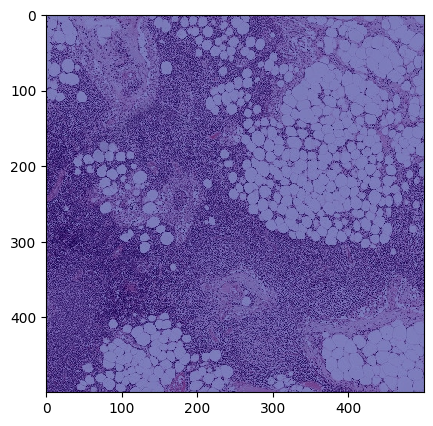

In [0]:
img_file, mask_img_file = pairs[0]
img = Image.open(img_file).convert('RGB')
mask_img = Image.open(mask_img_file).convert('L')

plt.figure(figsize=(5,5), dpi=100)
plt.imshow(img)
plt.imshow(mask_img, cmap='jet', alpha=0.5)
plt.show()

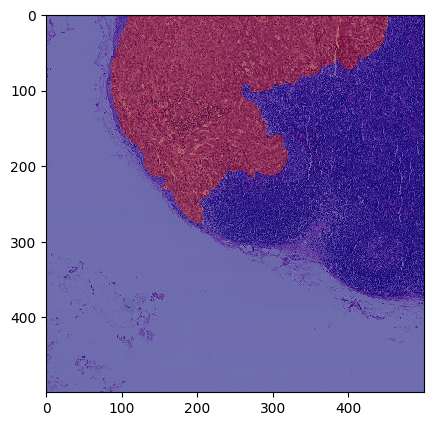

In [0]:
img_file, mask_img_file = os.path.join(train_path, 'train_20997.png'), os.path.join(train_path, 'train_mask_20997.png')
img = Image.open(img_file).convert('RGB')
mask_img = Image.open(mask_img_file).convert('L')

plt.figure(figsize=(5,5), dpi=100)
plt.imshow(img)
plt.imshow(mask_img, cmap='jet', alpha=0.5)
plt.show()

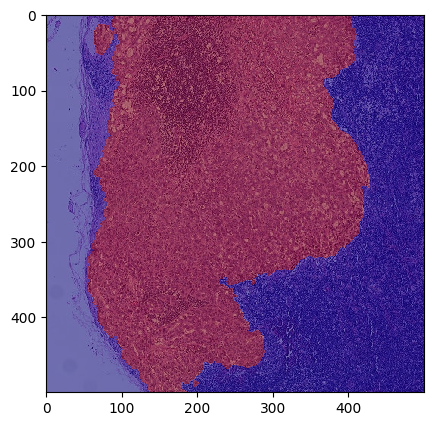

In [0]:
img_file, mask_img_file = os.path.join(train_path, 'train_20984.png'), os.path.join(train_path, 'train_mask_20984.png')
img = Image.open(img_file).convert('RGB')
mask_img = Image.open(mask_img_file).convert('L')

plt.figure(figsize=(5,5), dpi=100)
plt.imshow(img)
plt.imshow(mask_img, cmap='jet', alpha=0.5)
plt.show()